# Data loading and inspection

# Data loading and inspection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load train and test datasets
df = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
X_test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

# EDA Visualizations

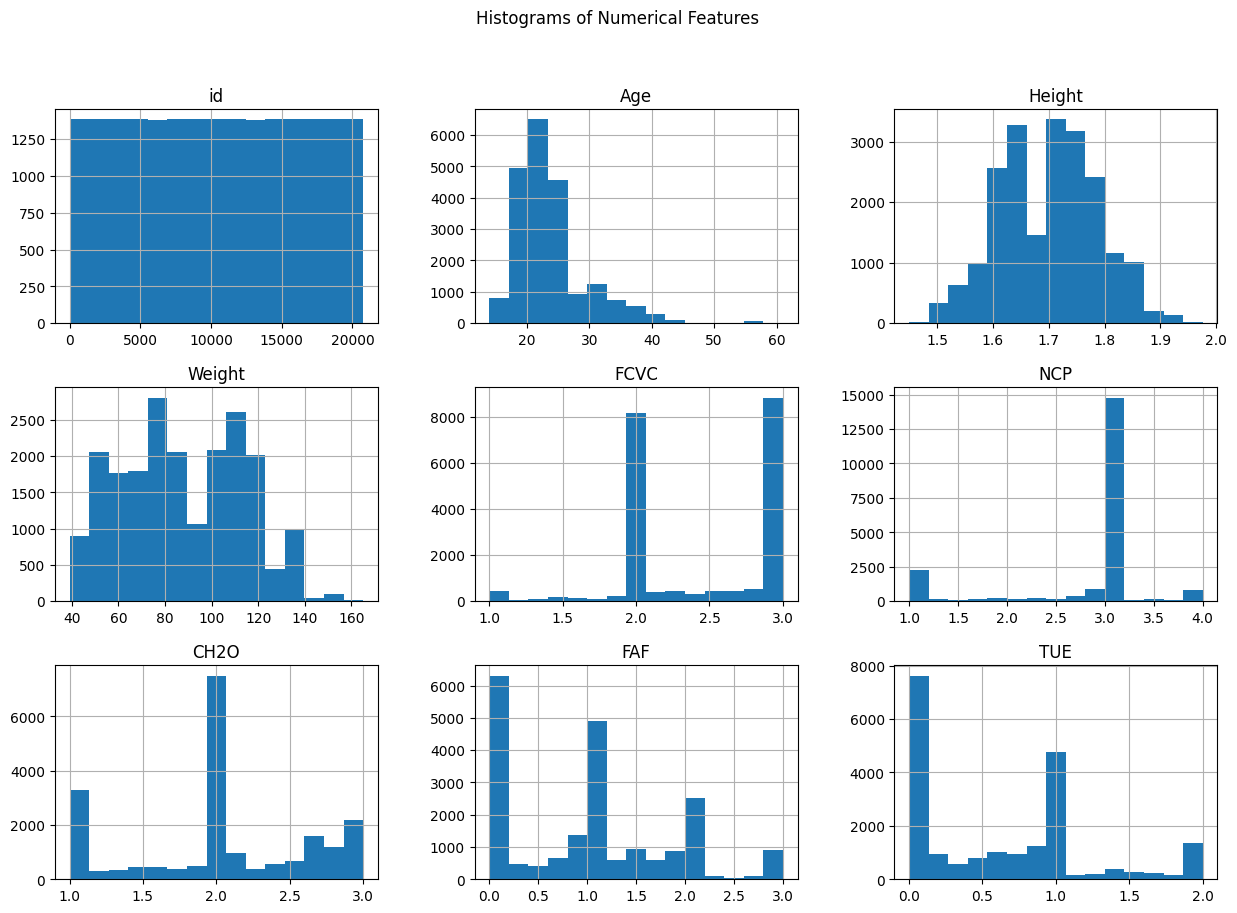

In [2]:
## Distribution of single variables (Histograms)
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

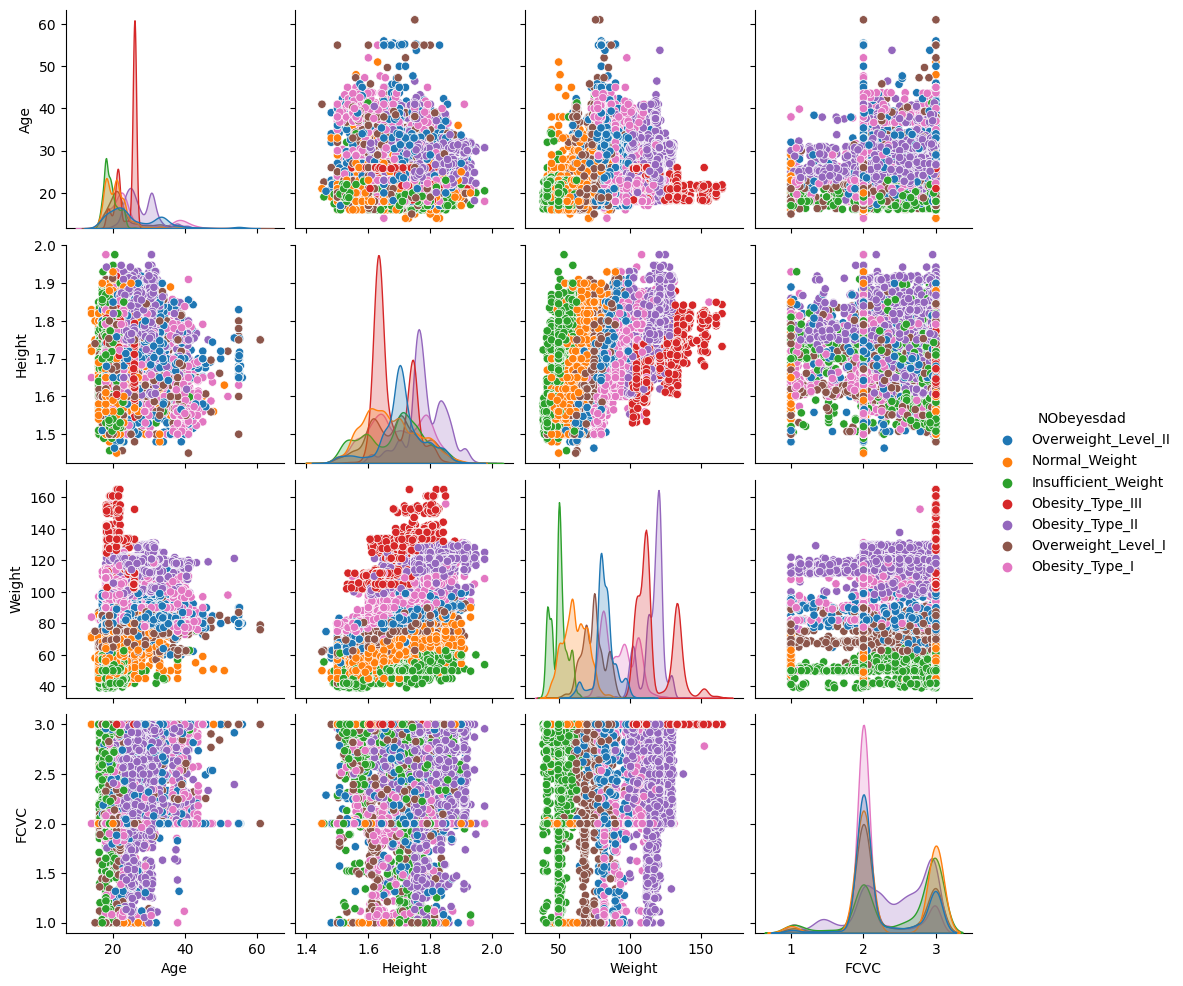

In [3]:
## Relationships between variables (Pair Plot)
sns.pairplot(df[['Age', 'Height', 'Weight', 'FCVC', 'NObeyesdad']], hue='NObeyesdad')
plt.show()

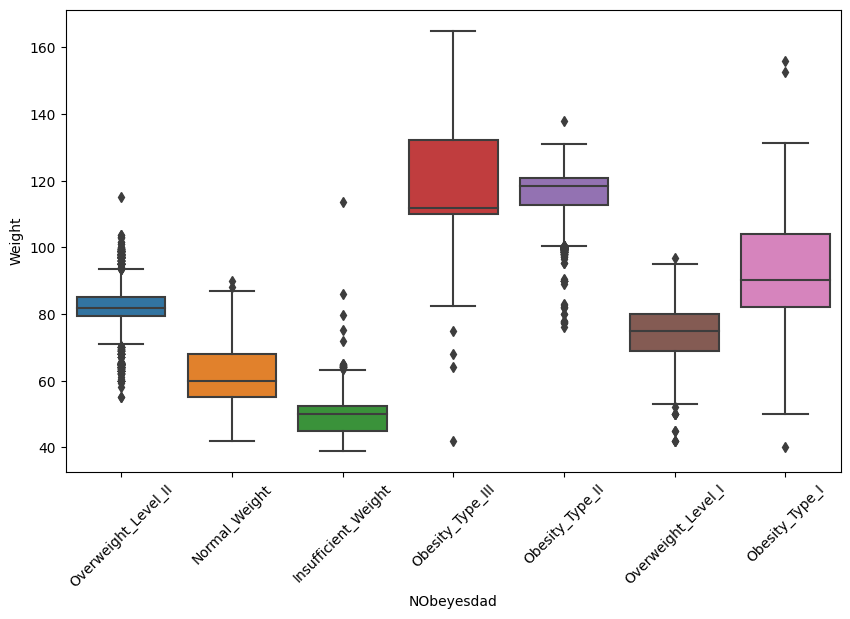

In [4]:
## Distribution and outliers (Box Plot and Violin Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Weight', data=df)
plt.xticks(rotation=45)
plt.show()

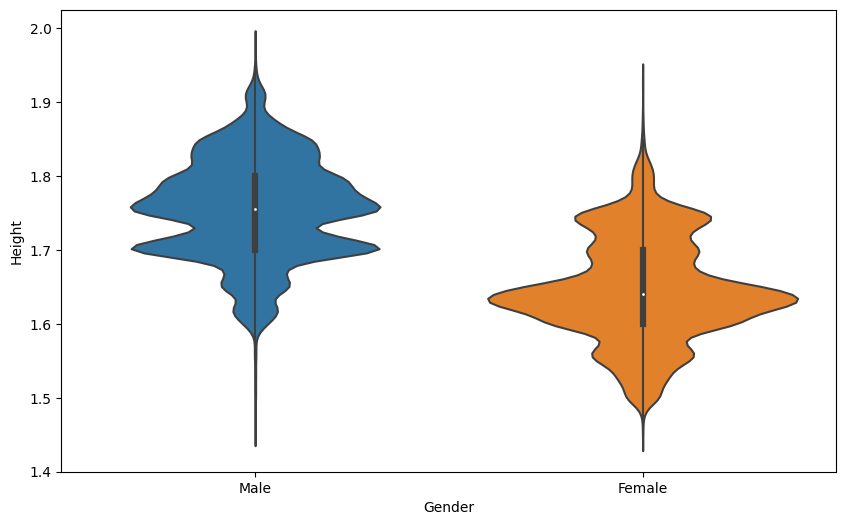

In [5]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Height', data=df)
plt.show()

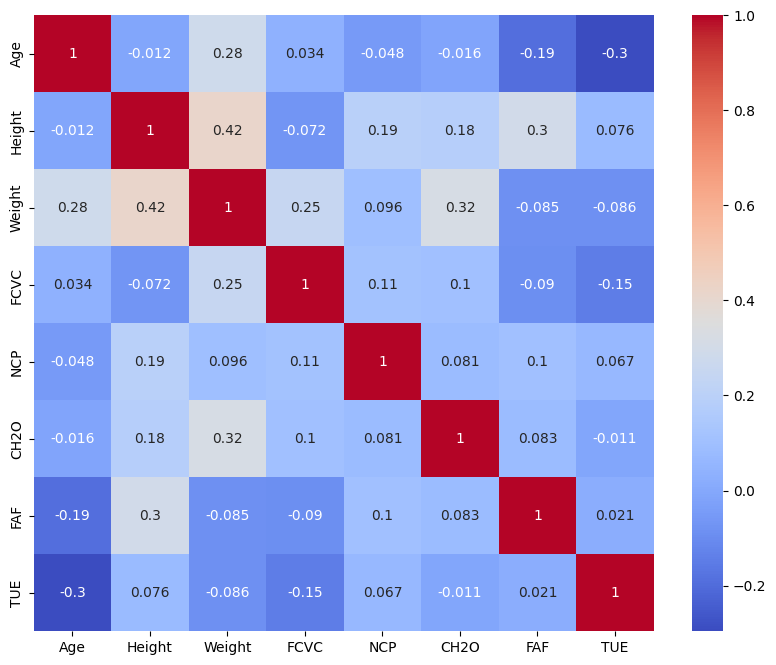

In [6]:
## Correlations (Correlation Heatmap)
corr = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

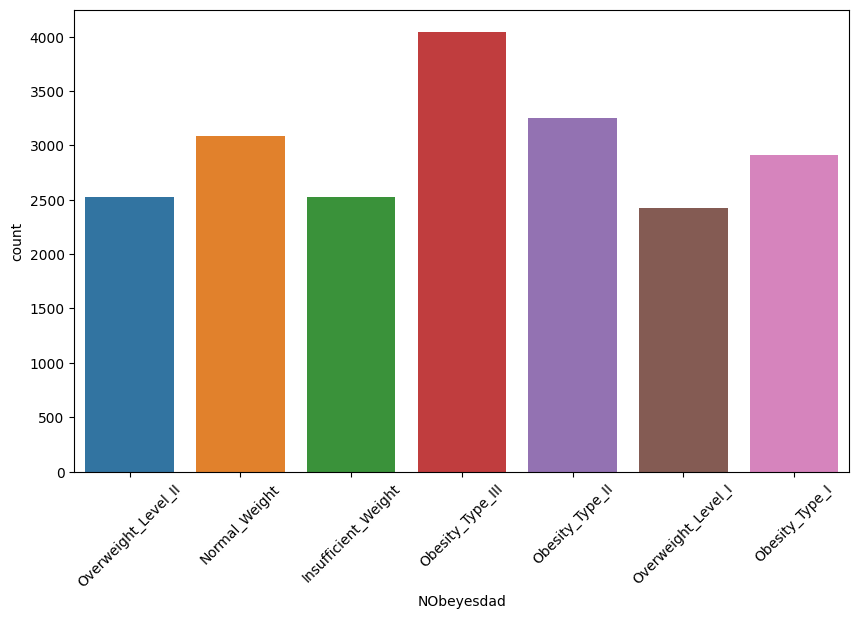

In [7]:
## Frequency distributions (Count Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=45)
plt.show()

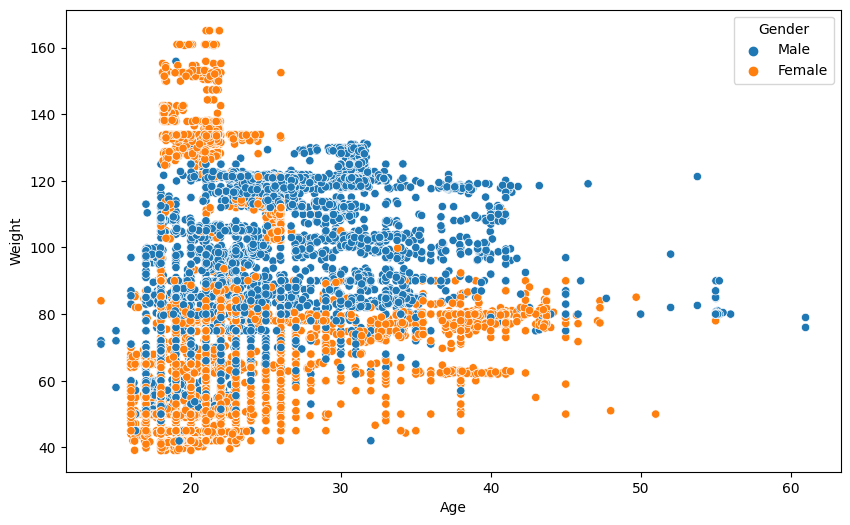

In [8]:
## Relationships with scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Weight', hue='Gender', data=df)
plt.show()

# Checking and handling duplicates and missing values

In [9]:
# check duplicates
df.duplicated().sum()

0

In [10]:
# check missing values
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# **Checking data type**

In [11]:
data_types = df.dtypes
print(data_types)

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [12]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


# **Analyzing unique values to identify categorical and continuous variables**

In [13]:
# check the number of unique values or categories of each column
for col_name in df.columns:
    unique_cat, name = len(df[col_name].unique()), df[col_name].unique()
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'id' has 20758 unique categories
Feature 'Gender' has 2 unique categories
Feature 'Age' has 1703 unique categories
Feature 'Height' has 1833 unique categories
Feature 'Weight' has 1979 unique categories
Feature 'family_history_with_overweight' has 2 unique categories
Feature 'FAVC' has 2 unique categories
Feature 'FCVC' has 934 unique categories
Feature 'NCP' has 689 unique categories
Feature 'CAEC' has 4 unique categories
Feature 'SMOKE' has 2 unique categories
Feature 'CH2O' has 1506 unique categories
Feature 'SCC' has 2 unique categories
Feature 'FAF' has 1360 unique categories
Feature 'TUE' has 1297 unique categories
Feature 'CALC' has 3 unique categories
Feature 'MTRANS' has 5 unique categories
Feature 'NObeyesdad' has 7 unique categories


# **Frequency analysis for categorical variables**

In [14]:
# Check frequency and relative frequency for categorical features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for feature in categorical_features:
    # Display frequency and relative frequency
    print("\nFeature: ", feature)
    print(df[feature].value_counts())
    print(df[feature].value_counts(normalize=True))
    print("--------------------------")


Feature:  Gender
Gender
Female    10422
Male      10336
Name: count, dtype: int64
Gender
Female    0.502071
Male      0.497929
Name: proportion, dtype: float64
--------------------------

Feature:  family_history_with_overweight
family_history_with_overweight
yes    17014
no      3744
Name: count, dtype: int64
family_history_with_overweight
yes    0.819636
no     0.180364
Name: proportion, dtype: float64
--------------------------

Feature:  FAVC
FAVC
yes    18982
no      1776
Name: count, dtype: int64
FAVC
yes    0.914443
no     0.085557
Name: proportion, dtype: float64
--------------------------

Feature:  CAEC
CAEC
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: count, dtype: int64
CAEC
Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: proportion, dtype: float64
--------------------------

Feature:  SMOKE
SMOKE
no     20513
yes      245
Name: count, dtype: int64
SMOKE
no     0.988197
yes    0.0118

In [15]:
# Data Preprocessing
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [16]:
X = df.drop(['id', 'NObeyesdad'], axis=1)
y = df['NObeyesdad']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

pipeline.fit(X_train, y_train)

val_predictions = pipeline.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f'Validation accuracy: {val_accuracy}')

Validation accuracy: 0.8860789980732178


In [17]:
# List of models to evaluate
models = [
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [18]:
# Dictionary to store the mean cross-validation scores for each model
model_scores = {}

In [19]:
# Iterate over the models list
for model in models:
    # Create a new pipeline with the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Compute the cross-validation scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    
    # Store the mean score for the model
    model_name = model.__class__.__name__
    model_scores[model_name] = scores.mean()
    print(f'{model_name} CV accuracy: {scores.mean():.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression CV accuracy: 0.8591
SVC CV accuracy: 0.8732
KNeighborsClassifier CV accuracy: 0.7552
DecisionTreeClassifier CV accuracy: 0.8409
RandomForestClassifier CV accuracy: 0.8893
GradientBoostingClassifier CV accuracy: 0.9027


In [20]:
# After evaluating all models, print the scores for each one
print("\nModel accuracies:")
for model_name, score in model_scores.items():
    print(f'{model_name}: {score:.4f}')


Model accuracies:
LogisticRegression: 0.8591
SVC: 0.8732
KNeighborsClassifier: 0.7552
DecisionTreeClassifier: 0.8409
RandomForestClassifier: 0.8893
GradientBoostingClassifier: 0.9027
